# Importing Libraries and Loading Data

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data Preprocessing: Handling Missing Values and Encoding Categorical Data

In [4]:
# Check for missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int32
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
 5   KMeans_Labels           200 non-null    int32
 6   DBSCAN_Labels           200 non-null    int64
 7   HC_Labels               200 non-null    int64
dtypes: int32(2), int64(6)
memory usage: 11.1 KB


In [15]:
df.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),KMeans_Labels,DBSCAN_Labels,HC_Labels
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000,2.170000,1.470000,1.140000
std,57.879185,0.497633,13.969007,26.264721,25.823522,1.680841,1.974485,1.037198
min,1.000000,0.000000,18.000000,15.000000,1.000000,0.000000,-1.000000,0.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000,1.000000,-1.000000,0.000000
50%,100.500000,0.000000,36.000000,61.500000,50.000000,2.000000,2.000000,1.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000,4.000000,3.000000,2.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000,5.000000,5.000000,3.000000


In [17]:
# Encode the 'Gender' column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])

# Feature Selection and Standardization

In [18]:
features = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
X = df[features]

# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

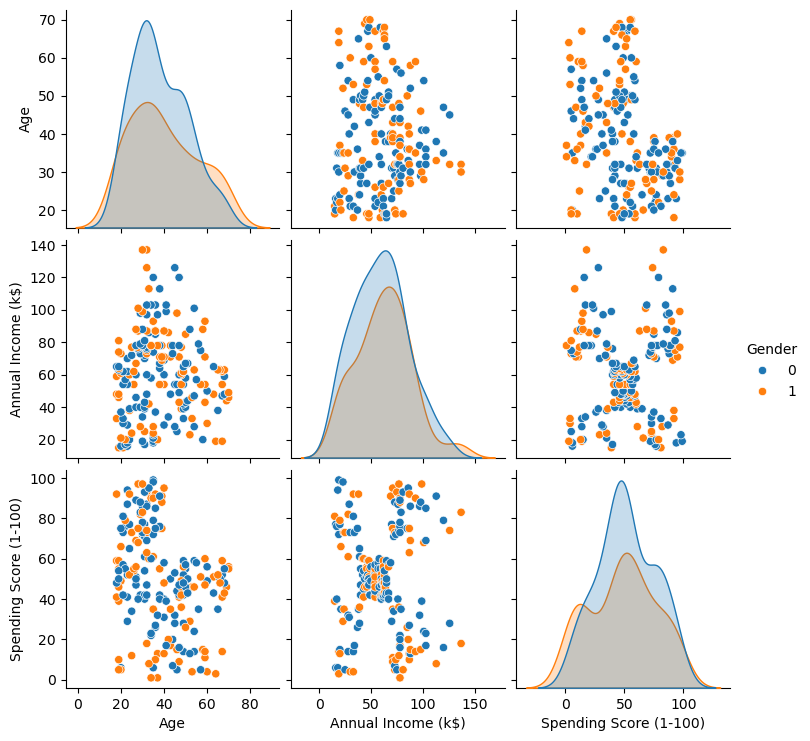

In [19]:
import seaborn as sns
sns.pairplot(df[features + ['Gender']], hue='Gender')
plt.show()

# K-Means Clustering: Determining Optimal Number of Clusters (Elbow Method)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

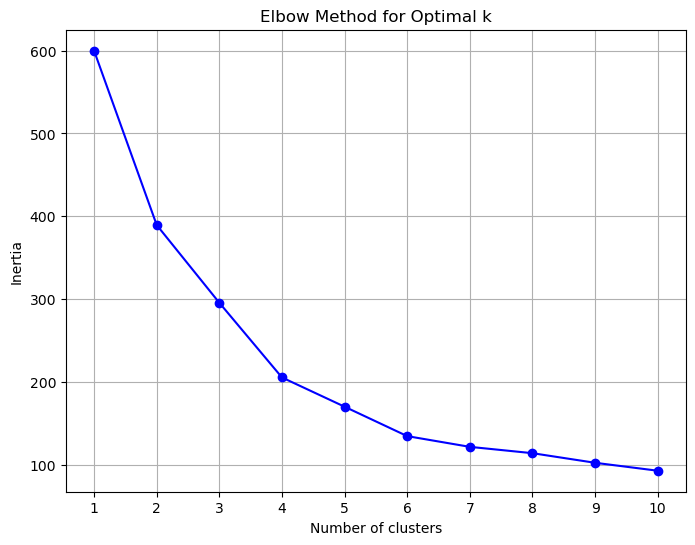

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(1, 11)

# Calculate inertia for each k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Dynamic Silhouette Loop for K-Means

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

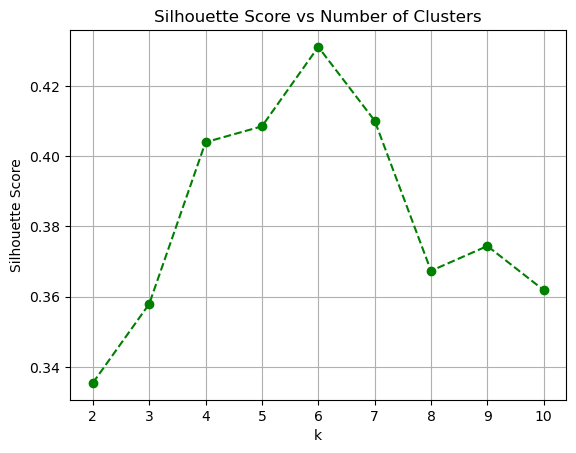

Best k by silhouette score: 6


In [8]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Plot
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--', color='green')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

best_k = k_range[np.argmax(silhouette_scores)]
print(f"Best k by silhouette score: {best_k}")


# K-Means Clustering: Applying the Model and Visualization

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


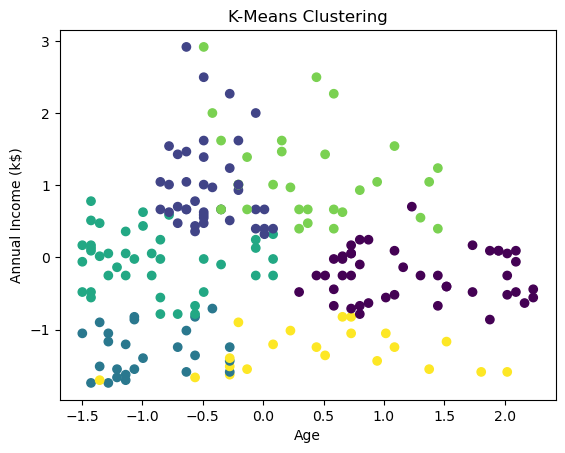

In [9]:
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataframe
df['KMeans_Labels'] = kmeans_labels

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels)
plt.title('K-Means Clustering')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

# DBSCAN Clustering

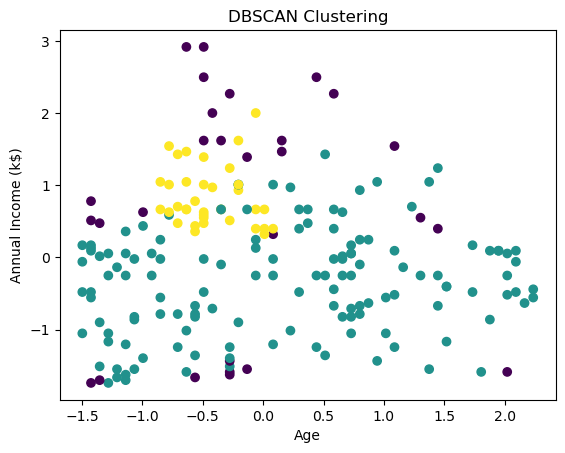

In [20]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Add cluster labels to the dataframe
df['DBSCAN_Labels'] = dbscan_labels

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels)
plt.title('DBSCAN Clustering')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

# Hierarchical Clustering

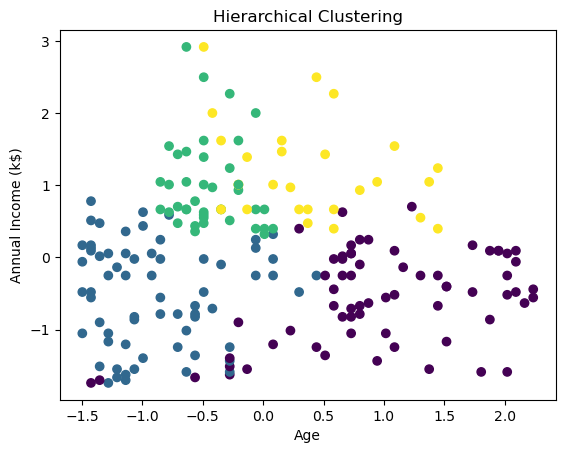

In [11]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=4, linkage='ward')
hc_labels = hc.fit_predict(X_scaled)

# Add cluster labels to the dataframe
df['HC_Labels'] = hc_labels

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=hc_labels)
plt.title('Hierarchical Clustering')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

# Evaluation: Silhouette Scores for Clustering Algorithms

In [21]:
from sklearn.metrics import silhouette_score

kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels)
hc_silhouette = silhouette_score(X_scaled, hc_labels)

print(f'K-Means Silhouette Score: {kmeans_silhouette}')
print(f'DBSCAN Silhouette Score: {dbscan_silhouette}')
print(f'Hierarchical Clustering Silhouette Score: {hc_silhouette}')

K-Means Silhouette Score: 0.43106526216603014
DBSCAN Silhouette Score: 0.18803828359177516
Hierarchical Clustering Silhouette Score: 0.3614512741691407
